<a href="https://colab.research.google.com/github/sudhakarmlal/EIP4Phase1/blob/master/Assignment3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### Load Cifar DataSet

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

## Plot the Images

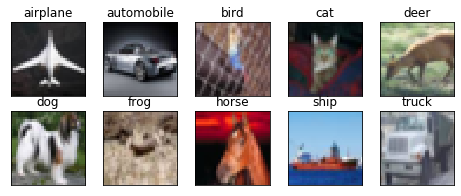

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Define various functions e.g  plot Model History and and Accuracy

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Set the training and Test features

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# summarize dataset shape
print('Train', train_features.shape, train_labels.shape)
print('Test', (test_features.shape, test_labels.shape))
# summarize pixel values
print('Train', train_features.min(), train_features.max(), train_features.mean(), train_features.std())
print('Test', test_features.min(), test_features.max(), test_features.mean(), test_features.std())

Train (50000, 32, 32, 3) (50000, 10)
Test ((10000, 32, 32, 3), (10000, 10))
Train 0.0 1.0 0.4733649 0.25156906
Test 0.0 1.0 0.47658524 0.25121963


### Plot training image

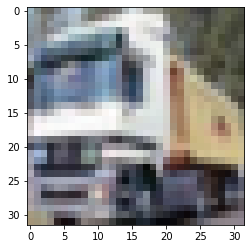

In [8]:
# Plot the training image
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(train_features[1])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


In [0]:
# checkpoint
filepath="./Assignment6_07_06_2019_evng-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler, verbose=1)]

In [14]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 19s 50ms/step - loss: 1.8495 - acc: 0.2872 - val_loss: 1.4201 - val_acc: 0.4770
Epoch 2/50
390/390 [==============================] - 12s 31ms/step - loss: 1.3626 - acc: 0.5041 - val_loss: 1.1505 - val_acc: 0.5854
Epoch 3/50
390/390 [==============================] - 12s 31ms/step - loss: 1.1357 - acc: 0.5977 - val_loss: 0.9606 - val_acc: 0.6594
Epoch 4/50
390/390 [==============================] - 12s 31ms/step - loss: 0.9855 - acc: 0.6559 - val_loss: 0.8666 - val_acc: 0.6942
Epoch 5/50
390/390 [==============================] - 12s 31ms/step - loss: 0.8963 - acc: 0.6880 - val_loss: 0.8036 - val_acc: 0.7281
Epoch 6/50
390/390 [==============================] - 12s 31ms/step - loss: 0.8250 - acc: 0.7149 - val_loss: 0.7432 - val_acc: 0.7429
Epoch 7/50
390/390 [==============================] - 12s 31ms/step - loss: 0.7592 - acc: 0.7380 - val_loss: 0.7093 - val_acc: 0.7574
Epoch 8/50
390/390 [==============================] - 

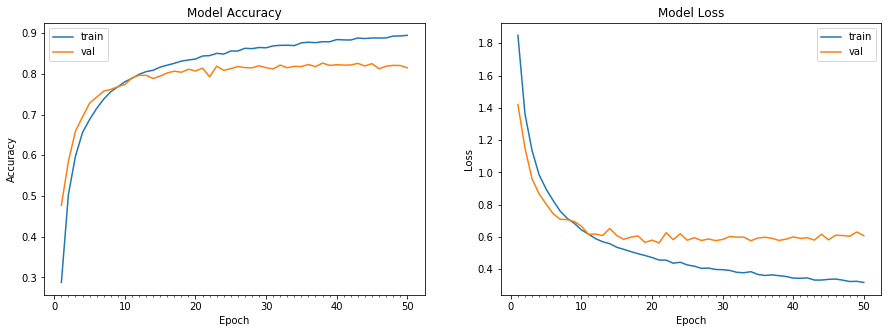

Accuracy on test data is: 81.48


In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Define the Model

In [0]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, SeparableConv2D
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D,SeparableConv2D


## Step1. Normal Convolution
#### The input size of the image is   32  * 32  * 3.In step 1 we would be convolving the 32*32 *3  image with 3*3  * 32 (32 Filters).

#### This would generate 32 Channels

In [0]:
input_shape = (32,32)+(3,)
img_input = Input(shape = input_shape)
x = Conv2D(32,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(img_input)#(3*3,32*32) of the form (effective global receptive field,output channel size )
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)


## Step2. Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))


#### The input size of the image is   32  * 32  * 32 which is the output of step1 We would be performing spatially separable convolution.Fir with  3  * 1 * 32 (32 Filters) and then with 1 *3 * 32(32 filters)

#### This would again generate 32 Channels

In [0]:
x = Conv2D(32,kernel_size=(3,1),strides=1,padding = 'same',data_format='channels_last',use_bias=False)(x) 
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = Conv2D(32,kernel_size=(1,3),strides=1,padding = 'same',data_format='channels_last',use_bias=False)(x) #(5*5,32*32)
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)


## Step3.Depthwise Separable Convolution


#### The input size of the image is   32  * 32  * 32 which is the output of step2. We would be performing Depthwise separable  convolution on this.We would be using  3*3 filters,32 of them which would convolve with each of the 32 channels  i.e each channel will convolve with a  3 * 3 filter thus generating 32*32 channel outputs. 

#### On these  32 Channels we would be doing 1 * 1 convolution (32 of them)

#### This could be an optional step as SeparableConv2D is already doing PointWise convolution
#### Refer: https://keras.io/layers/convolutional/ for separableConv2D api(its mentioned its performing pointwise convolution) 

In [0]:
x=SeparableConv2D(32, (3,3), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(x)
#x = Conv2D(32,kernel_size=(3,3),strides=1,padding = 'same',data_format='channels_last',use_bias=False)(x) 


#This could be an optional step as SeparableConv2D is already doing PointWise convolution
# Refer: https://keras.io/layers/convolutional/

x = Conv2D(32, 1,strides=1,data_format='channels_last',use_bias=False )(x) 
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
conv_1 = x



## Step4.Convolution(3 * 3 )


#### A 3 * 3 convolution is done on the output of step3 .Also a 5 * 5 convolution is done on output of step3.The output of this 3 * 3 convolution is grouped with the output of 5*5

 






In [0]:
x = Conv2D(32,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(conv_1) 
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)



In [0]:
x = MaxPooling2D(pool_size=(2,2),data_format='channels_last')(x) #(10*10,16*16)
x = Dropout(0.1)(x)


## Step5.3*3  Convolution




In [0]:
x = Conv2D(64,3,strides=1,padding='same',data_format='channels_last',dilation_rate = 1,use_bias=False)(x)
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)

#conv_1 = x

#x = Conv2D(128,3,strides=1,padding = 'same',data_format='channels_last',dilation_rate = 2,use_bias=False)(x)
#x = BatchNormalization(axis = 3)(x)
#x = Activation('relu')(x)
#x = Dropout(0.1)(x)
#conv_2 = x

#x = concatenate([conv_1, conv_2])


In [0]:
#x = Conv2D(32,1,strides=1,data_format='channels_last',use_bias=False)(x)
#x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2),data_format='channels_last')(x) #(32*32,8*8)
x = Dropout(0.1)(x)                
          
                
#x = Conv2D(64,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(x)
#x = BatchNormalization(axis = 3)(x)
#x = Activation('relu')(x)  
#x = Dropout(0.1)(x)

x = Conv2D(10, 1,strides=1,data_format='channels_last',use_bias=False)(x) 
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)


In [0]:
x = Conv2D(num_classes,(8,8))(x)
x = Flatten()(x)
output = Activation('softmax')(x)


In [0]:
model = Model(inputs=img_input, outputs=output)

In [38]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        3072      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128 

## Compile the Model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0618 09:13:21.769809 140601961621376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
# checkpoint
filepath="./Assignment6_12_06_2019-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler, verbose=1)]

### Perform Image Normalization and execute the Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()
W0618 09:15:40.103960 140601961621376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_di

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 29s 73ms/step - loss: 1.3961 - acc: 0.4919 - val_loss: 1.1967 - val_acc: 0.5787

Epoch 00001: val_acc improved from -inf to 0.57870, saving model to ./Assignment6_12_06_2019-01-0.58.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 24s 61ms/step - loss: 0.9852 - acc: 0.6508 - val_loss: 1.2738 - val_acc: 0.5456

Epoch 00002: val_acc did not improve from 0.57870
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 23s 60ms/step - loss: 0.8280 - acc: 0.7082 - val_loss: 0.8827 - val_acc: 0.6923

Epoch 00003: val_acc improved from 0.57870 to 0.69230, saving model to ./Assignment6_12_06_2019-03-0.69.hdf5
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [============================

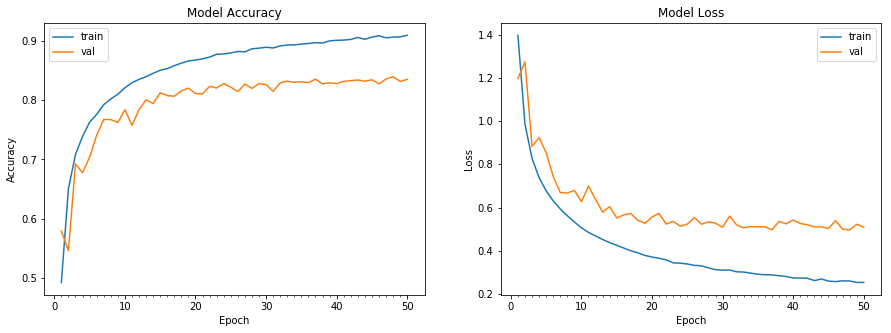

Accuracy on test data is: 83.54


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,data_format='channels_last')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callbacks_list )
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))